<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style="color:#fff"><font size="6">Análisis del crimen en México</font></h4>
    </strong>
</div>
<br>
<!-- Agrega la imagen justo aquí debajo del título -->
<img src="https://www.elsoldelcentro.com.mx/mexico/sociedad/u1t8ff-armas-crimenorganizado/alternates/LANDSCAPE_768/Armas-CrimenOrganizado" alt="Imagen: "" style="max-width: 100%;">
<br>
<p></p>





<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>1.Importaciones de librerias</font></h4>
    </strong>
</div><br>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#GENERAL PLOT SETTINGS
#style sheet
plt.style.use('_classic_test_patch')

#background in plots
c_background = '#FFFFFF'

#color for the XYZ planes for the 3d plots
rgba_planes = (231/255, 231/255, 231/255)


%matplotlib inline

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>2.Carga de los datos</font></h4>
    </strong>
</div><br>

In [2]:
#import the csv as a Data Frame
df = pd.read_csv('data/CrimesMX2017.csv', encoding='ISO-8859-1')
df.head(10)

,ENTITY_CODE,STATE,ID,HOMICIDES,CAR_THEFT,EXTORTION,STREET_TRANSPORT_THEFT,HOME_THEFT,FRAUD,POPULATION,URBAN_PP
0,1,AGUASCALIENTES,AS,83,17547,5188,4973,7823,3677,1321453,0.808277
1,2,BAJACALIFORNIA,BC,2144,17349,4965,4977,11665,4953,3584605,0.922662
2,3,BAJACALIFORNIASUR,BS,740,9803,3394,1522,7931,3559,809833,0.860283
3,4,CAMPECHE,CC,76,6459,3128,4104,6522,3625,935047,0.745742
4,5,COAHUILADEZARAGOZA,CL,273,6204,3534,3083,4415,4645,3029740,0.899927
5,6,COLIMA,CM,848,6594,5333,2430,6156,3193,747801,0.887692
6,7,CHIAPAS,CS,593,2391,2937,4199,4696,2067,5382083,0.487281
7,8,CHIHUAHUA,CH,2221,8261,5282,3603,5306,3628,3782018,0.848209
8,9,CIUDADDEMÉXICO,DF,1315,15917,6359,19325,4442,6618,8811266,0.995368
9,10,DURANGO,DG,197,6117,4448,2401,3051,3094,1799320,0.688725


In [3]:
df.shape

(32, 11)

In [4]:
#name of the columns
df.columns.values

array(['ENTITY_CODE', 'STATE', 'ID', 'HOMICIDES', 'CAR_THEFT',
       'EXTORTION', 'STREET_TRANSPORT_THEFT', 'HOME_THEFT', 'FRAUD',
       'POPULATION', 'URBAN_PP'], dtype=object)

In [5]:
#type of data we have
df.dtypes

ENTITY_CODE                 int64
STATE                      object
ID                         object
HOMICIDES                   int64
CAR_THEFT                   int64
EXTORTION                   int64
STREET_TRANSPORT_THEFT      int64
HOME_THEFT                  int64
FRAUD                       int64
POPULATION                  int64
URBAN_PP                  float64
dtype: object

In [6]:

df.describe().transpose().iloc[1:-2].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
CAR_THEFT,32.0,8371.59375,4043.664235,2391.0,6006.75,7125.5,10131.25,17547.0
STREET_TRANSPORT_THEFT,32.0,5811.34375,4663.878357,1522.0,3056.00,4339.0,6398.25,23061.0
EXTORTION,32.0,5607.59375,2615.813373,2300.0,3403.00,5076.5,7119.25,12459.0
HOME_THEFT,32.0,5519.84375,1879.005796,3051.0,4186.50,5345.5,6441.00,11665.0
FRAUD,32.0,3833.78125,1312.221798,2032.0,2916.25,3607.0,4899.75,6983.0
HOMICIDES,32.0,974.18750,804.847428,50.0,407.75,715.5,1561.75,3046.0


Se puede observar que los promedios más altos de número de delitos por cada cien mil habitantes son:
1. **ROBO_COCHE**
2. **STREET_TRANSPORT_THEFT**
3. **EXTORSIÓN**

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>3.Distibución de los datos</font></h4>
    </strong>
</div><br>

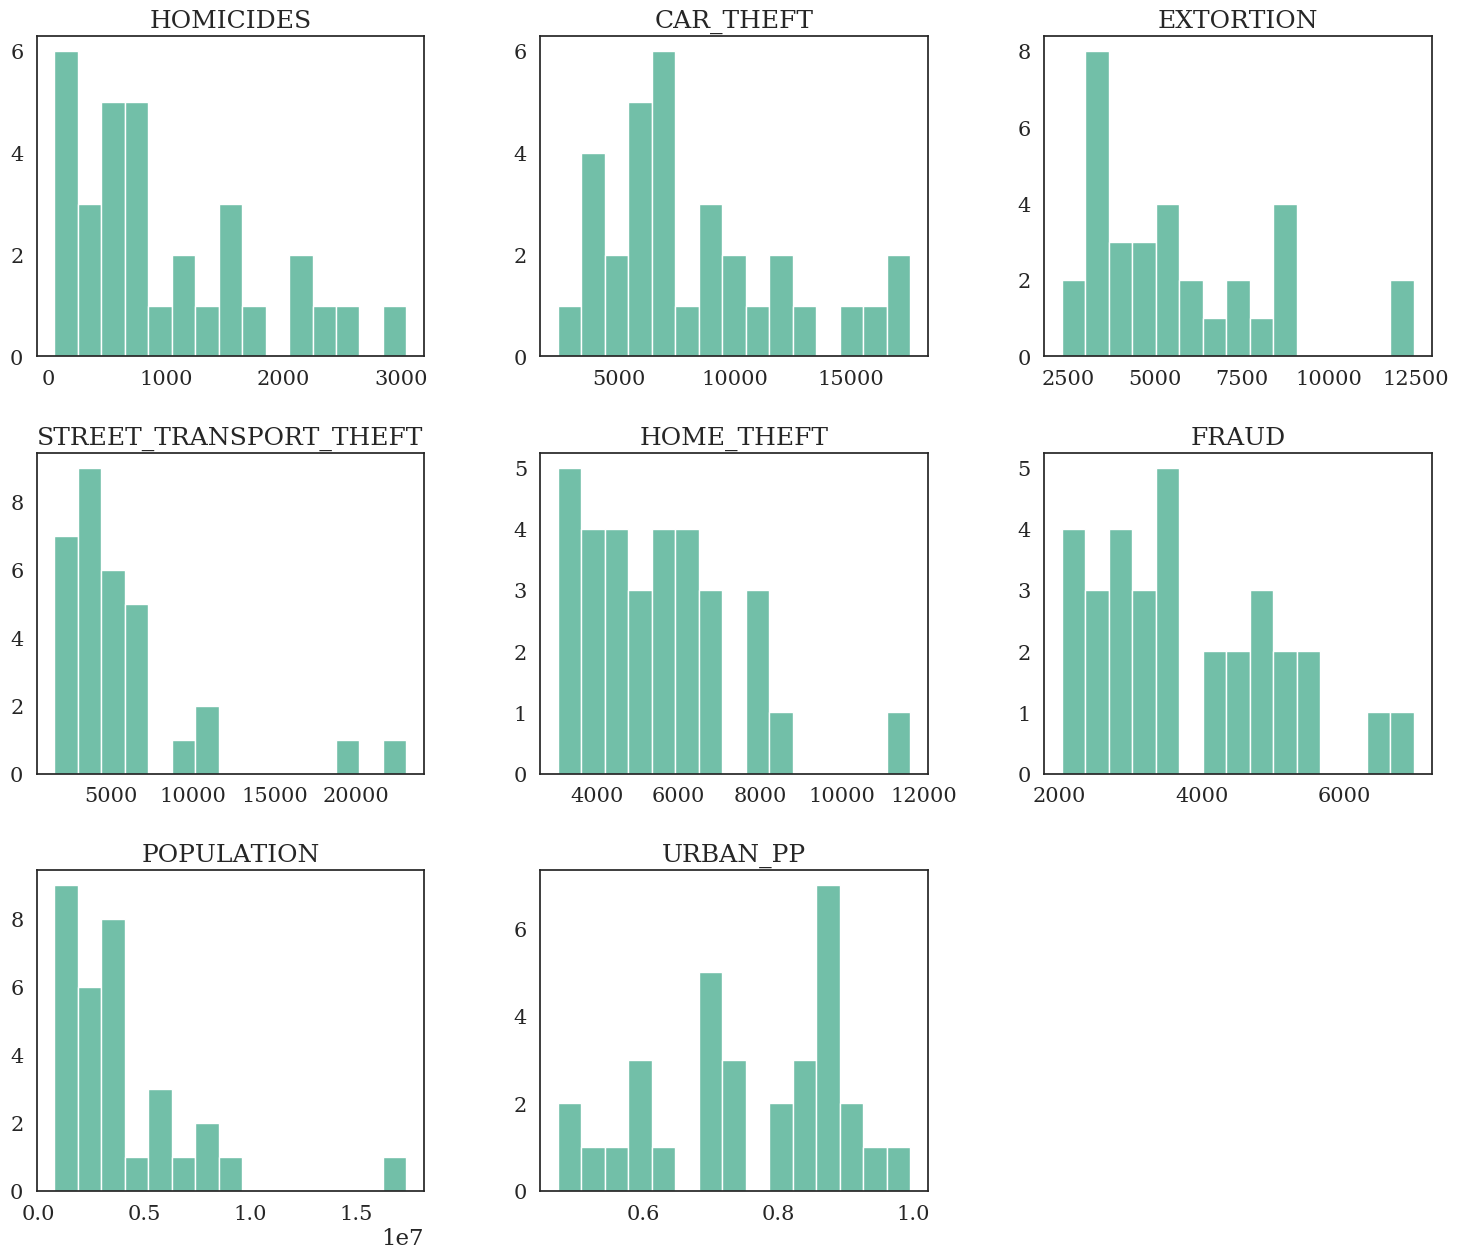

In [8]:
#seaborn font size and style of plot
sns.set( font_scale = 1.5, style = 'white' )

#matplotlib font type
plt.rc('font', family='serif')

df.iloc[:,3:].hist( figsize=(18,15), bins=15,
                   xlabelsize = 15, ylabelsize = 15,
                   color = '#72BFA8',
                   grid = False)
plt.show()

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>4.Correlaciónde los datos</font></h4>
    </strong>
</div><br>

In [9]:
variables = np.array( [ 'HOMICIDES', 'CAR_THEFT', 'EXTORTION', 'STREET_TRANSPORT_THEFT' ] )

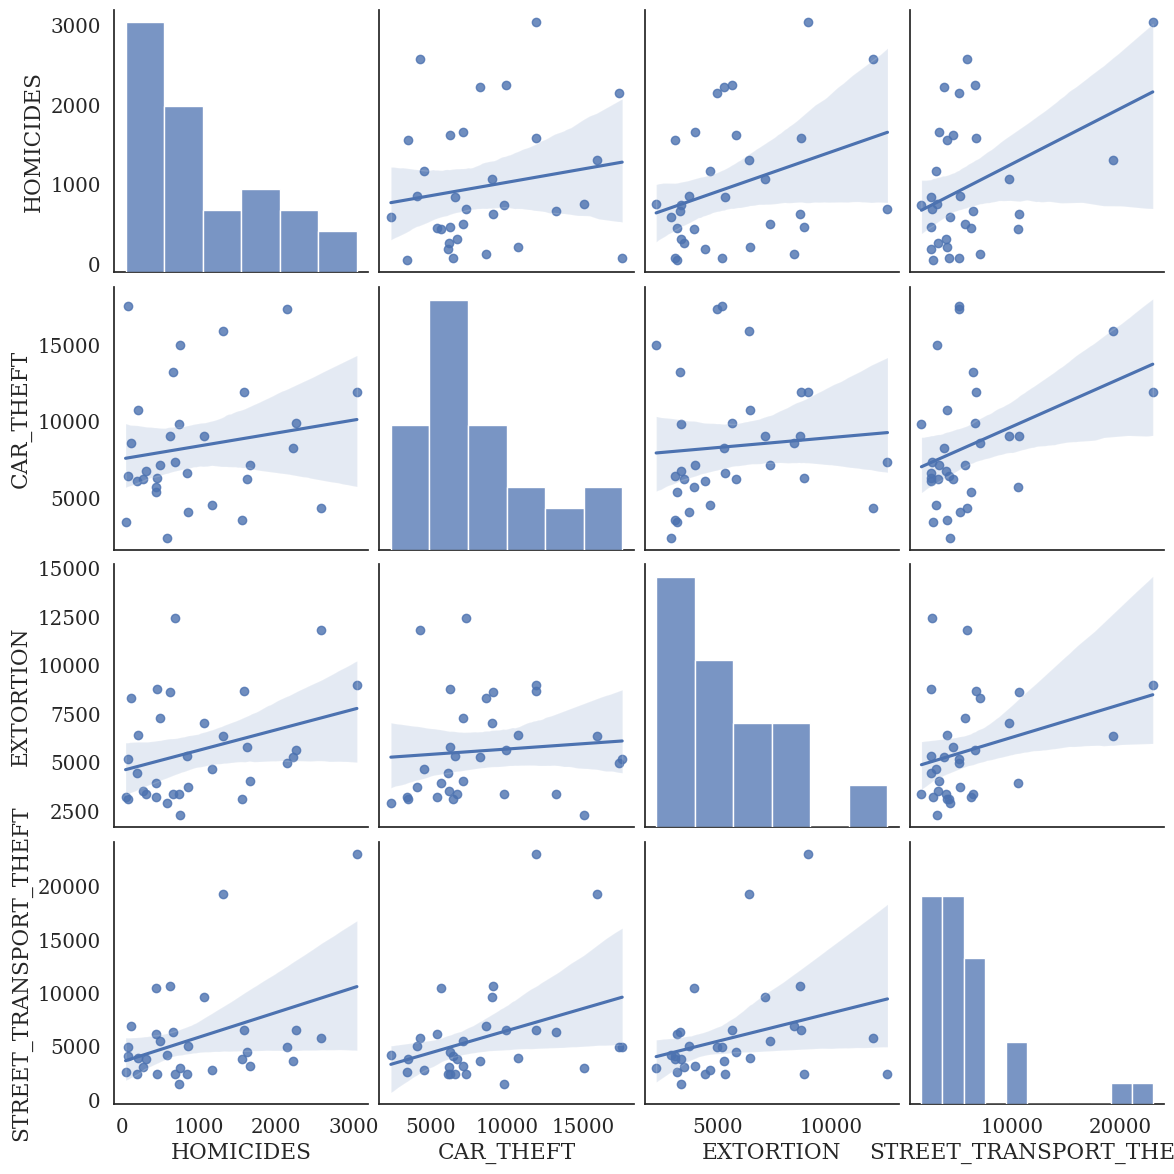

In [10]:
#relative size of the labels on the pairplot
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')

sns.pairplot( df[ variables ],
             kind = 'reg',
             height= 3.0, aspect=1.0,
            )
plt.show()

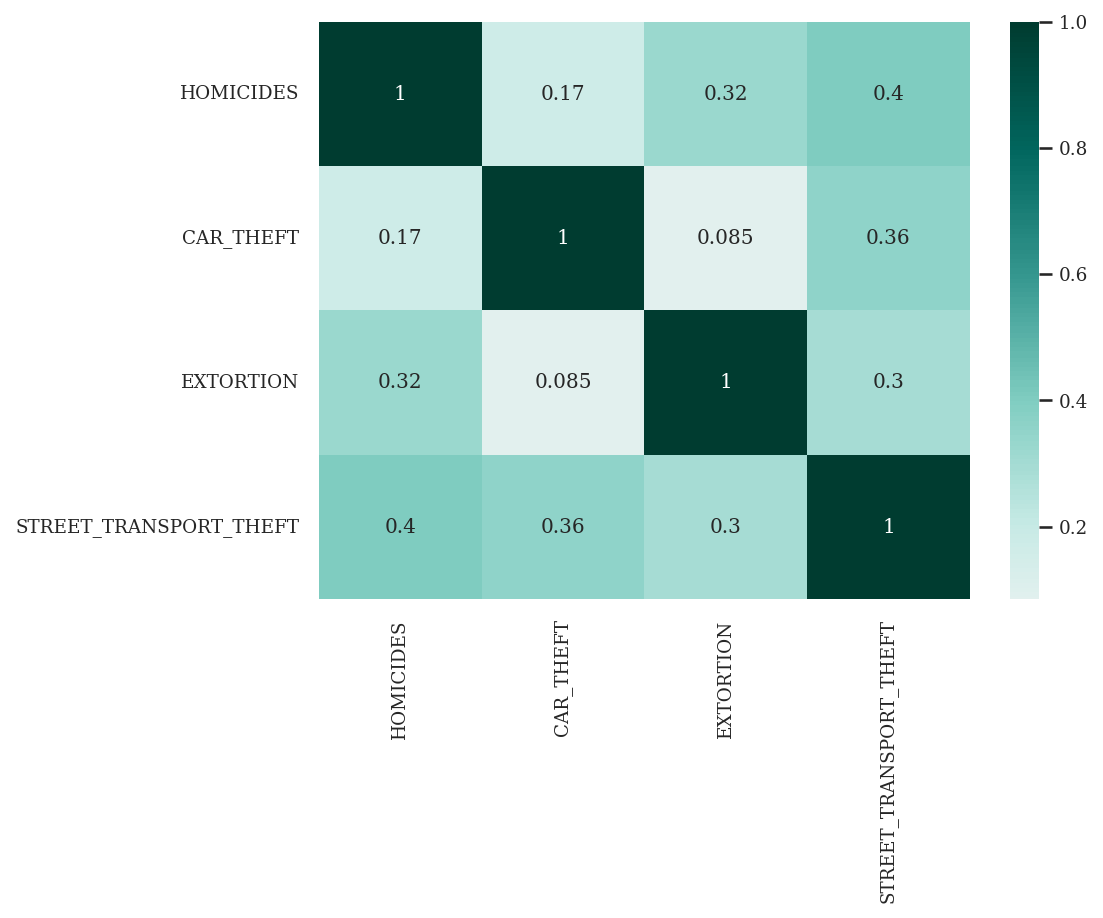

In [11]:
#Matriz de correlación 

plt.figure( dpi = 150,
           figsize=(7,5)
          )


corrMatrix = df[variables].corr().round(3)


sns.set( font_scale= 0.8 )
plt.rc('font', family='serif')



sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )


plt.xticks( rotation = 90 )
plt.yticks( rotation = 0 )

plt.show()

<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>5.Data preprocessing: Standardization</font></h4>
    </strong>
</div><br>

In [13]:
#Aquí estandarizamos un conjunto de datos
from sklearn import preprocessing
df_standardized = preprocessing.scale( df[variables] )
df_standardized = pd.DataFrame( df_standardized )
df_standardized.head()

,0,1,2,3
0,-1.124993,2.305390,-0.162973,-0.182629
1,1.476716,2.255641,-0.249588,-0.181757
2,-0.295627,0.359652,-0.859776,-0.934411
3,-1.133829,-0.480554,-0.963092,-0.371936
4,-0.885146,-0.544624,-0.805399,-0.594355


<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>6.K-Means Algorithm and Cluster Analysis</font></h4>
    </strong>
</div><br>

In [16]:
# Aplicamos el codo de jambu

#WCSS (Within-Cluster Sum of Squares) es una métrica  para evaluar la cohesión de los clusters formados. 
#Representa la suma de las distancias al cuadrado de cada punto dentro de un cluster respecto a su centroide correspondiente.
wcss = []

#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)
wcss

c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

[128.0,
 89.58721388234738,
 67.99243915223303,
 53.555050377120196,
 39.06144491493076,
 34.001237180607525,
 30.354366680850774,
 26.78619494513333,
 21.22181606678049,
 17.96023741512382,
 15.212654923750677,
 14.48704303098384,
 11.955038680763323,
 9.85235509501912]

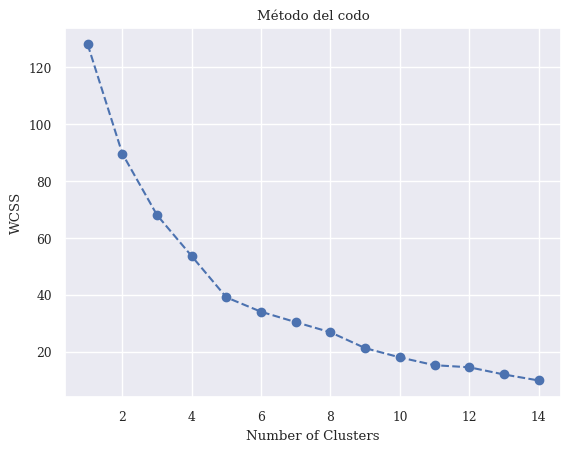

In [18]:
#gafrica del codo de jambu

plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Método del codo')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()


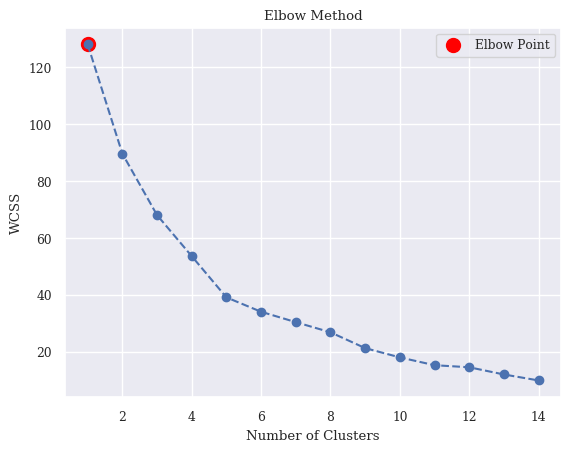

In [19]:
import numpy as np

# Finding the elbow point (the point of maximum curvature)
deltas = np.diff(wcss, 2)
elbow_point = np.argmax(deltas) + 1

# Plotting the elbow method with special marker
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 

# Highlighting the elbow point
plt.scatter(elbow_point, wcss[elbow_point - 1], c='red', s=100, label='Elbow Point')

plt.legend()
plt.show()


In [20]:
### Silhouette Method

In [22]:
silhouette_score(df_standardized,  kmeans.labels_)

0.20422159592048195

In [23]:
#create a list of K-Means models. Each element is a KMeans model with a specific number of clusters
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++').fit(df_standardized) for i in range(1,15)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#save the silhouette coefficient in an array
sil_values = np.array( sil_values )
sil_values

c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

array([0.31977873, 0.26433558, 0.28232129, 0.31414159, 0.26881288,
       0.26857214, 0.239065  , 0.24246006, 0.23518512, 0.21323904,
       0.16033357, 0.18722217, 0.2042216 ])

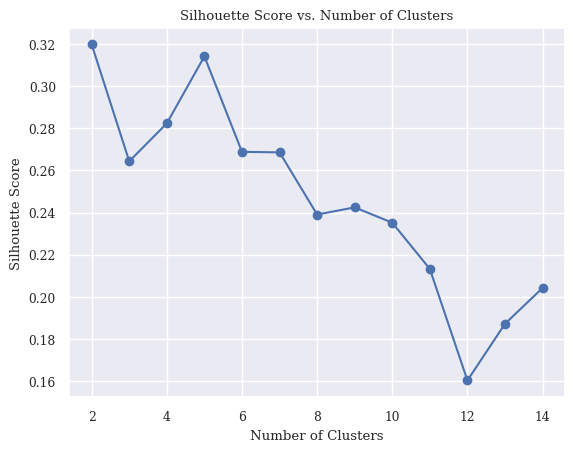

In [24]:
import matplotlib.pyplot as plt

# Plotting the Silhouette scores
plt.plot(range(2, 15), sil_values, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score') 
plt.show()


In [25]:
print( 'Max. Silhouette Score:', sil_values[ np.argmax(sil_values) ] )
print( 'Optimal number of cluters:', np.argmax(sil_values) + 1 + 1 )

Max. Silhouette Score: 0.31977873437471016
Optimal number of cluters: 2


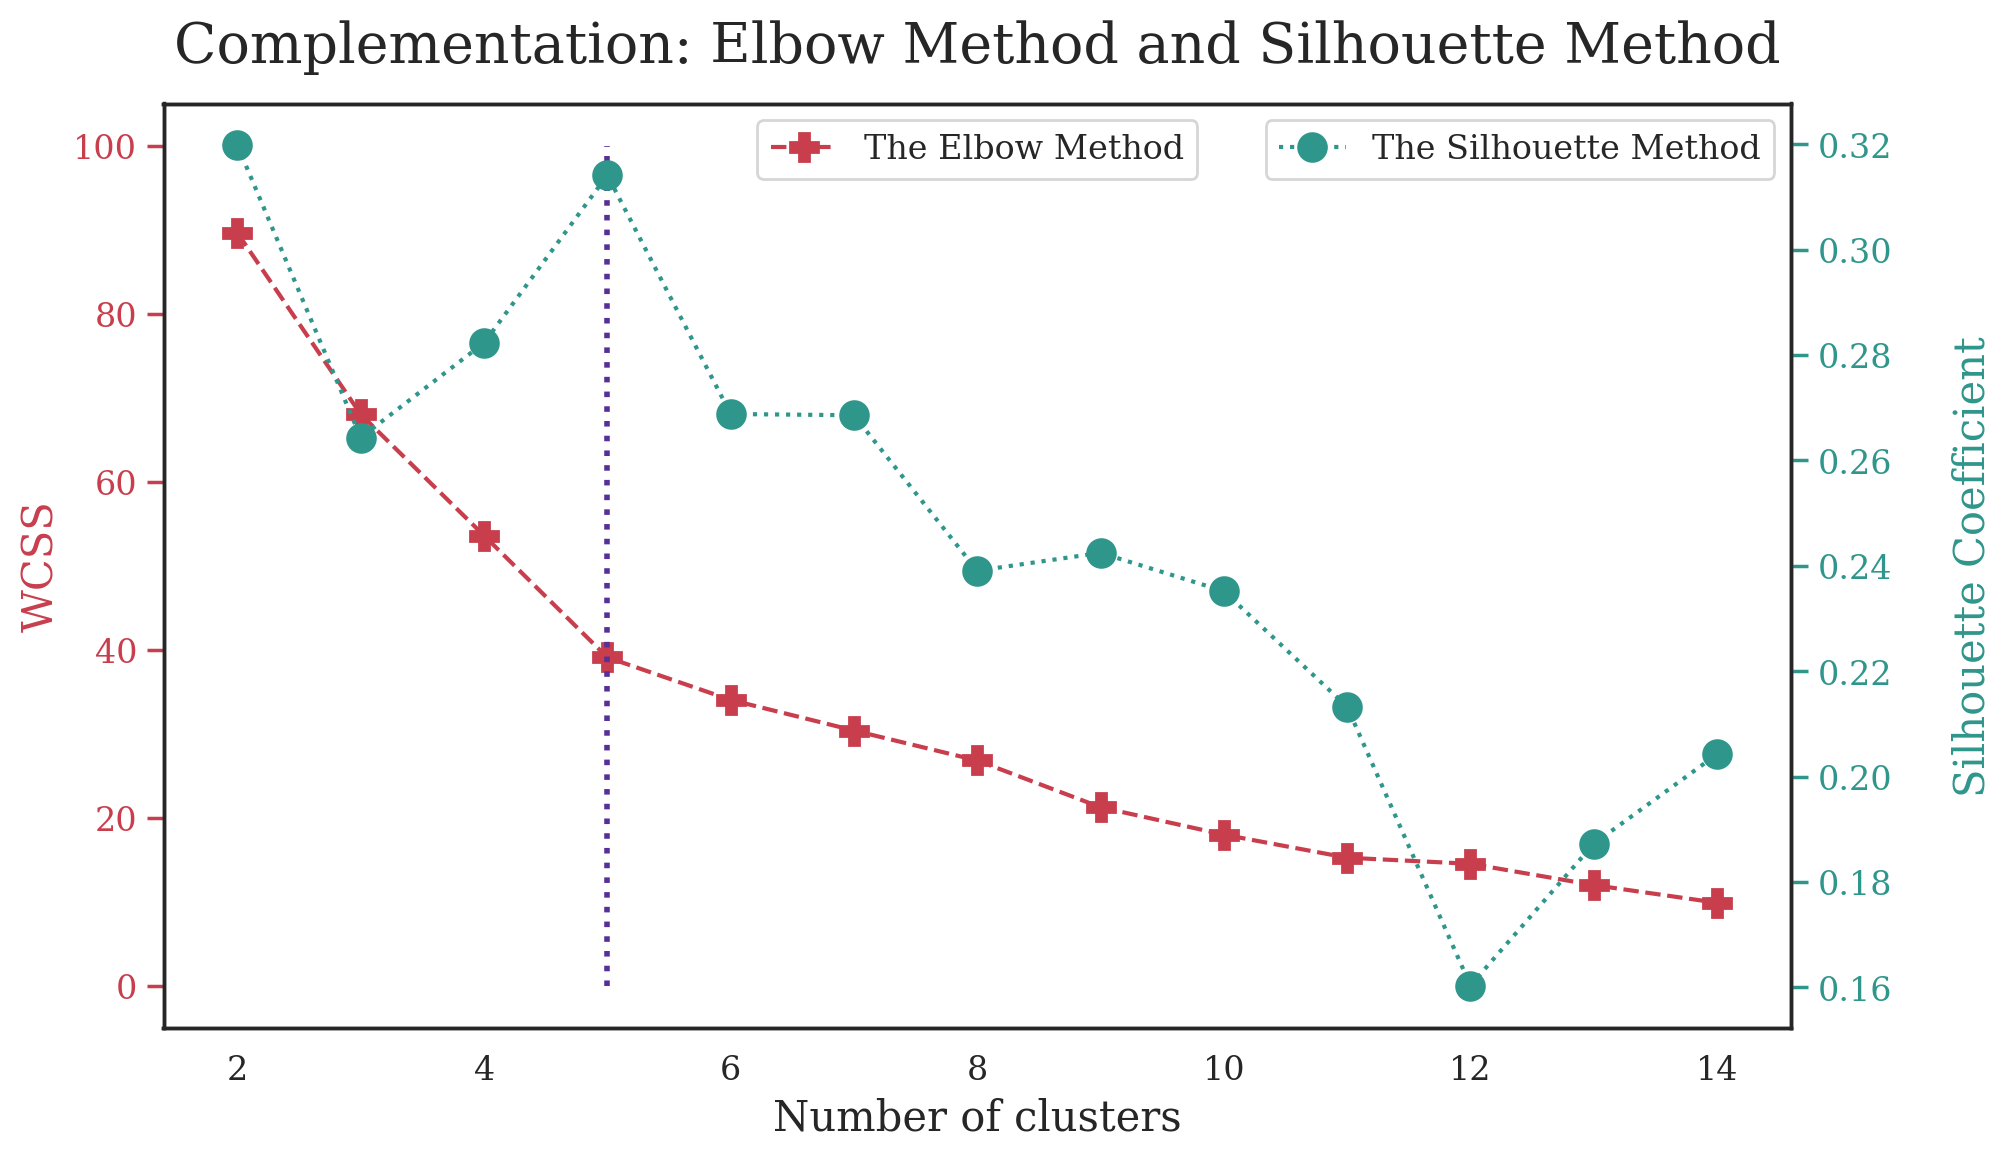

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define el color de fondo
c_background = 'white'

# Configuración de estilo y fuente
sns.set(style='white')
plt.rc('font', family='serif')

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(10.5, 6), facecolor=c_background, dpi=200)

# Título y color de fondo
ax1.set_title('Complementation: Elbow Method and Silhouette Method', size=20, pad=15)
ax1.set_facecolor(c_background)

# Gráfico de WCSS
ax1.plot(range(2, 15), wcss[1:], linestyle='--', linewidth=1.5,
         marker='P', markersize=10, color='#C83E4D', label='The Elbow Method')

# Número óptimo de clusters
ax1.plot([5, 5], [0, 100], linestyle=':', linewidth=2, color='#572F96')

# Etiquetas y tamaño de fuente
ax1.set_xlabel('Number of clusters', size=15)
ax1.set_ylabel('WCSS', size=15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12, colors='#C83E4D')
ax1.yaxis.label.set_color('#C83E4D')

# Leyenda
plt.legend(loc='upper center', prop={'size': 12})

# Coeficiente de Silhouette
ax2 = ax1.twinx()
ax2.plot(range(2, 15), sil_values, linestyle=':', linewidth=1.5,
         marker='o', markersize=10, color='#2F968B', label='The Silhouette Method')

# Etiquetas y tamaño de fuente para el eje y secundario
ax2.set_ylabel('\nSilhouette Coefficient', size=15)
ax2.tick_params(axis='y', labelsize=12, colors='#2F968B')
ax2.yaxis.label.set_color('#2F968B')

# Leyenda
plt.legend(loc='upper right', prop={'size': 12})

# Mostrar el gráfico
plt.show()


In [30]:
#Use of n_clusters = 5
kmeans = KMeans( n_clusters=5, init='k-means++', random_state=11 )

#train and prediction on our normalized data
predicted_y = kmeans.fit_predict( df_standardized )

#numbers of cluster goes from 0 to 4, we're adding +1 to the array
predicted_y = predicted_y + 1 

predicted_y

c:\Users\zukan\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([5, 5, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 2, 3, 1, 4, 4, 5, 1, 2, 4,
       1, 4, 2, 5, 1, 1, 4, 1, 1, 4])

In [31]:
df['CLUSTER'] = predicted_y
df[ ['CLUSTER', 'STATE'] ].head()

,CLUSTER,STATE
0,5,AGUASCALIENTES
1,5,BAJACALIFORNIA
2,1,BAJACALIFORNIASUR
3,1,CAMPECHE
4,1,COAHUILADEZARAGOZA


<div style="background:#0B4AAB;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 5>7.Análisis de las salidas</font></h4>
    </strong>
</div><br>

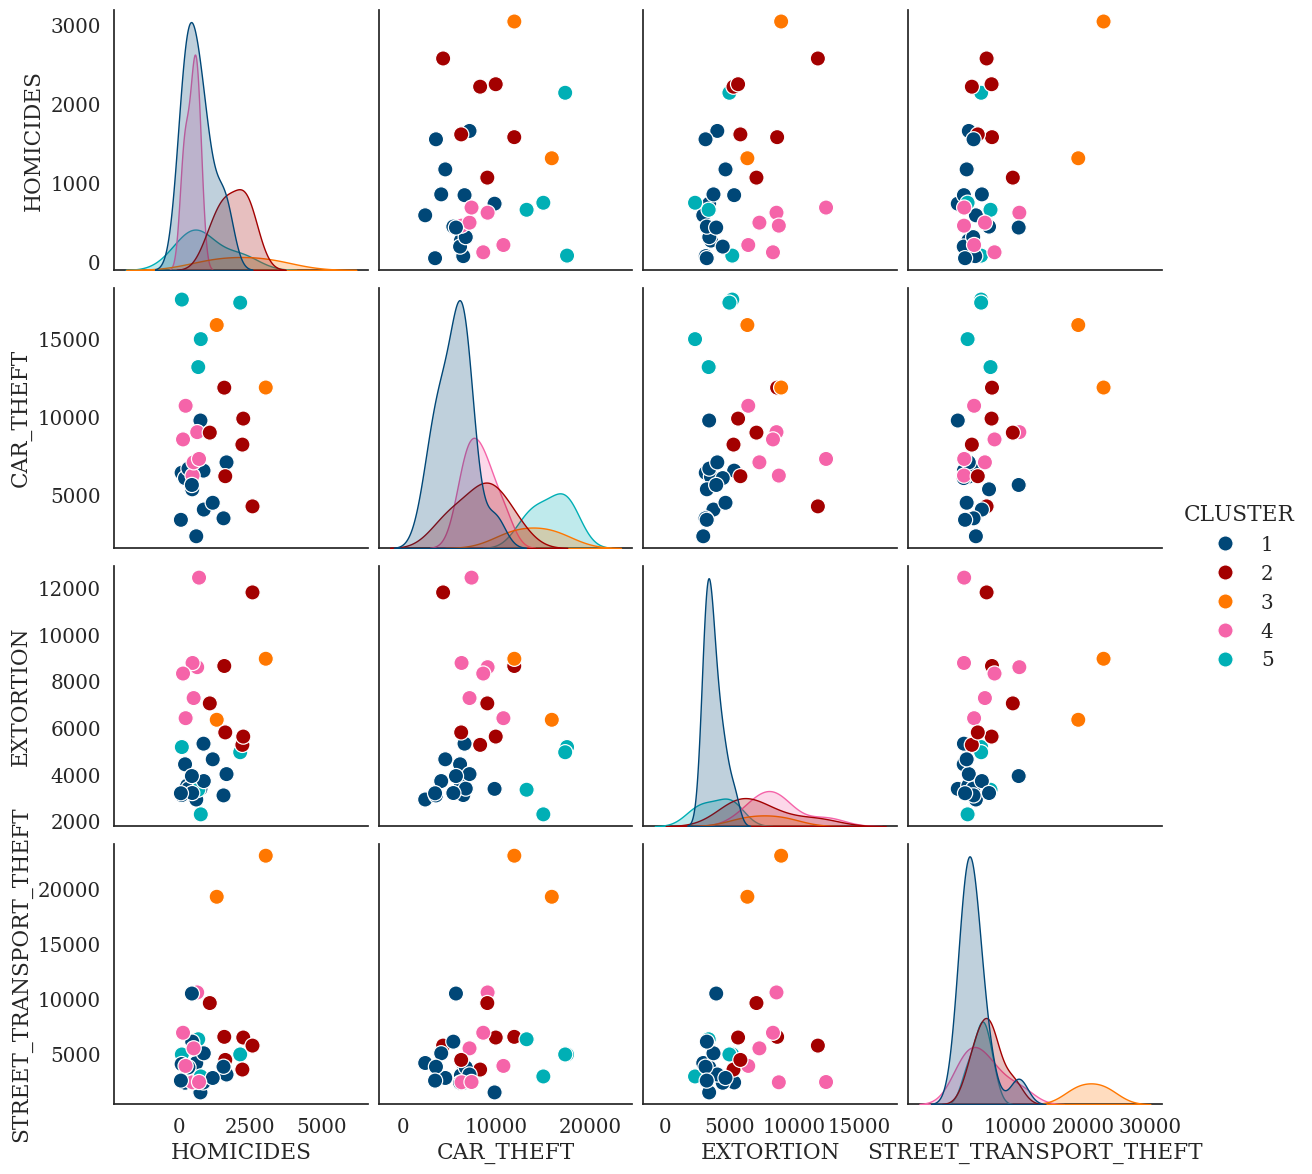

In [32]:
#the new variables for the pairplot
variables_cluster = np.append( variables, 'CLUSTER' )

#Color palette for the clusters
colours_cluster = ['#004777', '#A30000', '#FF7700',
                   '#F564A9', '#00AFB5']

#setting plot config
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')


sns.pairplot( df[variables_cluster], 
             hue='CLUSTER', 
             palette=colours_cluster, 
             height=3, aspect=1,
             plot_kws= dict(s=120),
             corner = False,
            )
plt.show()

In [33]:
df_dict = df.set_index( 'ID' )['CLUSTER']

states_geo = 'data/states_mx.json'

#use folium to create map
import folium
map_mex = folium.Map( location = [24,-102], zoom_start = 4.5 )

#colour a state according to its cluster
def my_color_function(feature):
    if df_dict[feature['id']] == 1:
        return colours_cluster[0]
    elif df_dict[feature['id']] == 2:
        return colours_cluster[1]
    elif df_dict[feature['id']] == 3:
        return colours_cluster[2]
    elif df_dict[feature['id']] == 4:
        return colours_cluster[3]
    elif df_dict[feature['id']] == 5:
        return colours_cluster[4]

In [34]:
for i in range(4):
    folium.GeoJson(
        states_geo,
        style_function=lambda feature: {
            'fillColor': my_color_function(feature),
            'color' : 'black',
            'fill_opacity' : 10.1,
            'weight' : 0.3,
            }
        ).add_to(map_mex)

map_mex